# EXPLORING THE AMES HOUSING DATASET

## Introduction

This analysis aims to provide insight various key variables in the Ames Dataset such as sale price, overall house condition etc. 
This will help in understanding the relationship between these variables and how they impact the sale price of houses. This insight will act as a foundation for identifying the various factors affecting sale price of houses. This information can be leveraged by various real estate stakeholders such as investors, developers, house flippers, agents etc to make informed decisions about property investments, market trends, and pricing strategies.

To access my presentation ([Click on this link](https://docs.google.com/presentation/d/1hIhNQa19UBLehQOK52pRiWsLgLLJvrHNg3t49ztHi7w/edit?usp=sharing))

## Objectives

The objectives of this project are:

* To analyze the distribution of key housing variables and their impact on sale price.
* To analyze which zoning classification of the sale has the highest price.
* To explore the trends in home sale prices over time.
* To determine which features lead to a higher sale price.

## Questions
The research questions for this project are:

* What is the  distribution of key housing variables and their impact on sale price?
* Which zoning classification of the sale has the highest price?
* What are the trends in home sale prices over time?
* Which features lead to a higher sale price?

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [94]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
# Import the data_description.txt file which contains the descriptions of the values in each column.
with open('data/data_description.txt') as f:
    data = list(f.readlines())
data

['MSSubClass: Identifies the type of dwelling involved in the sale.\t\n',
 '\n',
 '        20\t1-STORY 1946 & NEWER ALL STYLES\n',
 '        30\t1-STORY 1945 & OLDER\n',
 '        40\t1-STORY W/FINISHED ATTIC ALL AGES\n',
 '        45\t1-1/2 STORY - UNFINISHED ALL AGES\n',
 '        50\t1-1/2 STORY FINISHED ALL AGES\n',
 '        60\t2-STORY 1946 & NEWER\n',
 '        70\t2-STORY 1945 & OLDER\n',
 '        75\t2-1/2 STORY ALL AGES\n',
 '        80\tSPLIT OR MULTI-LEVEL\n',
 '        85\tSPLIT FOYER\n',
 '        90\tDUPLEX - ALL STYLES AND AGES\n',
 '       120\t1-STORY PUD (Planned Unit Development) - 1946 & NEWER\n',
 '       150\t1-1/2 STORY PUD - ALL AGES\n',
 '       160\t2-STORY PUD - 1946 & NEWER\n',
 '       180\tPUD - MULTILEVEL - INCL SPLIT LEV/FOYER\n',
 '       190\t2 FAMILY CONVERSION - ALL STYLES AND AGES\n',
 '\n',
 'MSZoning: Identifies the general zoning classification of the sale.\n',
 '\t\t\n',
 '       A\tAgriculture\n',
 '       C\tCommercial\n',
 '       FV\tFloat

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`. The `ames.csv` dataset originates from the Kaggle Database and contains key housing variables such as sale price, condition of the house etc.

In [96]:
# Your code here
df = pd.read_csv('data/ames.csv', index_col=0)

The following code checks that you loaded the data correctly:

In [97]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [98]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [99]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Next, let's check summary statistics of the dataset using `.describe()` method:

In [100]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 2. Data Preparation

This is an important step in data analysis as this is where data is cleaned to ensure the dataset is accurate, complete  and reliable.

The first step of the data cleaning will be handling missing data. We can check for any missing data using the `.isna()` method:

In [101]:
# .sum() parameter returns the sum of missing data in the columns.
df.isna().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
MSSubClass          0
Length: 80, dtype: int64

There are many columns with missing values and will be time consuming handling each column. An alternative to this is checking the columns that we will be using for analysis for any missing values:

In [102]:
df[['SalePrice', 'OverallCond', 'TotRmsAbvGrd', 'BldgType', 'YrSold']].isna().sum()

SalePrice       0
OverallCond     0
TotRmsAbvGrd    0
BldgType        0
YrSold          0
dtype: int64

These columns have no missing values so we can drop the columns with the missing values. However, this can't be done since there is an assertion testing below which checks whether the columns are 80 and by dropping the columns with missing values, the code will generate an error. Just for the sake of practice let's write down the code used for dropping columns with missing values:

In [103]:
# Drop the columns with the missing values.
# df.dropna(axis=1, inplace=True)

Now let's recheck the dataset for any missing values:

In [104]:
df.isna().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
MSSubClass          0
Length: 80, dtype: int64

Voila! We have sorted the issue of the missing data.

The next step will be to check for any duplicated records in the dataset:

In [105]:
# Check for any duplicated records.
df.duplicated().sum()

0

This shows that there are no duplicated records in the dataset.

## 3. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

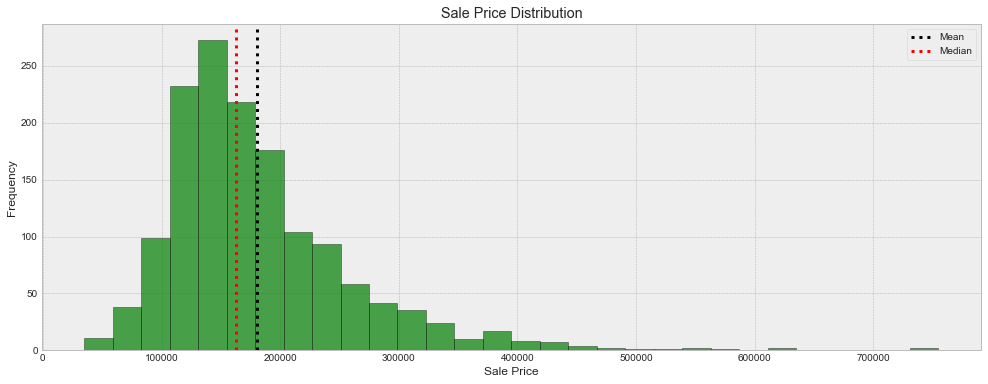

In [106]:
# Plot a histogram to visualize the sale price distribution.
plt.figure(figsize=(15,6))

# Set the style to 'bmh'
plt.style.use('bmh')

# Reduce the opacity to make the vertical lines more visible.
df['SalePrice'].hist(bins=30, edgecolor='black', color='green', alpha=0.7)

# Plot vertical lines for the sale price mean and median  
plt.axvline(df['SalePrice'].mean(), linestyle=':', linewidth=3, color='black', label='Mean')
plt.axvline(df['SalePrice'].median(), linestyle=':', linewidth=3, color='red', label='Median')

# Plot the labels
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Sale Price Distribution')
plt.legend();

Now, print out the mean, median, and standard deviation:

In [107]:
# Your code here
print(f"The Sale price mean is {df['SalePrice'].mean()}")
print(f"The Sale price median is {df['SalePrice'].median()}")
print(f"The Sale price standard deviation is {df['SalePrice'].std()}")

The Sale price mean is 180921.19589041095
The Sale price median is 163000.0
The Sale price standard deviation is 79442.50288288662


In the cell below, interpret the above information.

In [108]:
# Replace None with appropriate text
"""
The mean represents the average sale price. It means that houses were sold at a price of 180921 on average.
The median represents the middle price when the prices are arranged at an ascending order. A median price of 163000 means
that the central sale price was 163000. The median price is lower than the mean suggesting presence of some outlier values.
The standard deviation measures the spread of the sale price around the mean. A standard deviation of 79442 shows that the 
sale prices deviate widely around the mean. Since the mean is greater than the median, the sale price is positively skewed.
"""

'\nThe mean represents the average sale price. It means that houses were sold at a price of 180921 on average.\nThe median represents the middle price when the prices are arranged at an ascending order. A median price of 163000 means\nthat the central sale price was 163000. The median price is lower than the mean suggesting presence of some outlier values.\nThe standard deviation measures the spread of the sale price around the mean. A standard deviation of 79442 shows that the \nsale prices deviate widely around the mean. Since the mean is greater than the median, the sale price is positively skewed.\n'

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

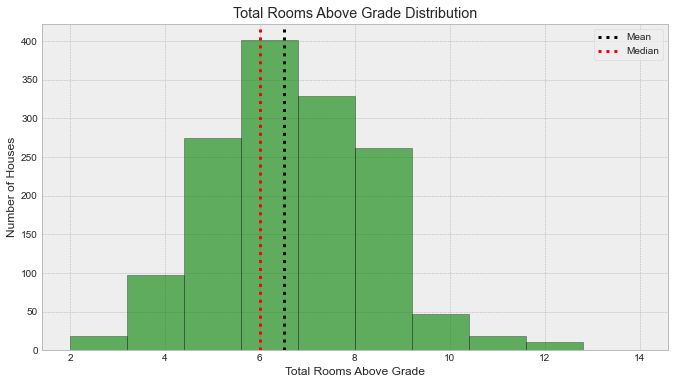

In [148]:
# Plot a histogram to show the total rooms above grade distribution
plt.figure(figsize=(10,6))

# Increase the trasparency to make the vertical lines more visible
df['TotRmsAbvGrd'].hist(bins=10, edgecolor='black', alpha=0.6, color='green')

# Plot vertical lines for the total rooms above grade mean and median  
plt.axvline(df['TotRmsAbvGrd'].mean(), linestyle=':', linewidth=3, color='black', label='Mean')
plt.axvline(df['TotRmsAbvGrd'].median(), linestyle=':', linewidth=3, color='red', label='Median')

# Plot the labels
plt.xlabel('Total Rooms Above Grade')
plt.ylabel('Number of Houses')
plt.title('Total Rooms Above Grade Distribution')
plt.legend();

Now, print out the mean, median, and standard deviation:

In [110]:
# Your code here
print(f"The Total Rooms Above Grade mean is {df['TotRmsAbvGrd'].mean()}")
print(f"The Total Rooms Above Grade median is {df['TotRmsAbvGrd'].median()}")
print(f"The Total Rooms Above Grade standard deviation is {df['TotRmsAbvGrd'].std()}")

The Total Rooms Above Grade mean is 6.517808219178082
The Total Rooms Above Grade median is 6.0
The Total Rooms Above Grade standard deviation is 1.6253932905840505


In the cell below, interpret the above information.

In [111]:
# Replace None with appropriate text
"""
A mean of 6.5 and a median of 6.0 shows that there are no outliers affecting the data. A standard deviation of 1.6 suggests 
that the data doesn't deviate much from the mean. Since the mean is slightly greater than the median, the data is slightly
positively skewed but is close to symmetry. Houses with 5 - 9 rooms above grade are very common in the housing market while
houses with more than 9 rooms above grade are rare in the market.
"""

"\nA mean of 6.5 and a median of 6.0 shows that there are no outliers affecting the data. A standard deviation of 1.6 suggests \nthat the data doesn't deviate much from the mean. Since the mean is slightly greater than the median, the data is slightly\npositively skewed but is close to symmetry. Houses with 5 - 9 rooms above grade are very common in the housing market while\nhouses with more than 9 rooms above grade are rare in the market.\n"

Let's explore the impact total rooms above grade has on the sale price of houses:

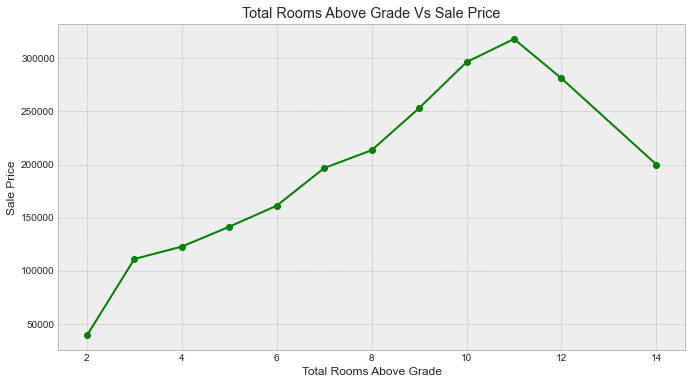

In [112]:
# Group the data by total rooms avove grade and calculate the mean sale price for each.
rooms_vs_price = df.groupby('TotRmsAbvGrd')['SalePrice'].mean()

# Create the line plot
plt.figure(figsize=(10,6))
rooms_vs_price.plot(marker='o', color='green')

# Plot the labels
plt.xlabel('Total Rooms Above Grade')
plt.ylabel('Sale Price')
plt.title('Total Rooms Above Grade Vs Sale Price');

In [113]:
"""
This line plot shows that as the number of rooms above grade increase, the sale price of the houses increases. The selling price
reaches its peak at 11 rooms above grade then starts starts falling as the number of rooms increase.
"""

'\nThis line plot shows that as the number of rooms above grade increase, the sale price of the houses increases. The selling price\nreaches its peak at 11 rooms above grade then starts starts falling as the number of rooms increase.\n'

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

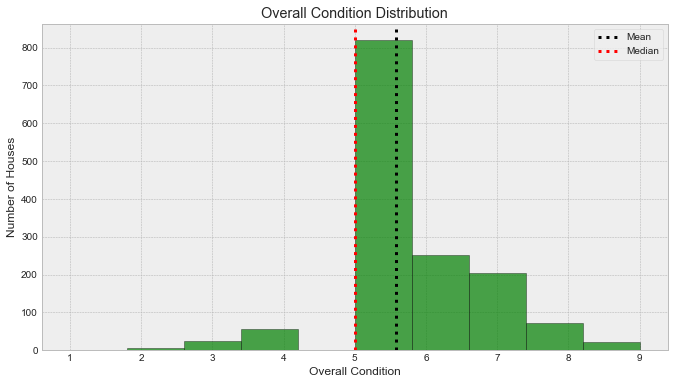

In [114]:
# Plot a histogram to visualize the overall condition distribution.
plt.figure(figsize=(10,6))

# Increase the trasparency of the histogram to make the vertical lines more visible.
df['OverallCond'].hist(bins=10, edgecolor='black', color='green', alpha=0.7)
                       
# Plot vertical lines for the overall condition mean and median                       
plt.axvline(df['OverallCond'].mean(), linewidth=3, linestyle=':', color='black', label='Mean')
plt.axvline(df['OverallCond'].median(), linewidth=3, linestyle=':', color='red', label='Median')

# Plot the labels.
plt.xlabel('Overall Condition')
plt.ylabel('Number of Houses')
plt.title('Overall Condition Distribution')
plt.legend();

Now, print out the mean, median, and standard deviation:

In [115]:
# Your code here
print(f"The Overall Condition mean is {df['OverallCond'].mean()}")
print(f"The Overall Condition median is {df['OverallCond'].median()}")
print(f"The Overall Condition standard deviation is {df['OverallCond'].std()}")

The Overall Condition mean is 5.575342465753424
The Overall Condition median is 5.0
The Overall Condition standard deviation is 1.1127993367127316


In the cell below, interpret the above information.

In [116]:
# Replace None with appropriate text
"""
A mean of 5.5 means that the average overall condition of the houses is 5.5 which is Average to Above Average. A standard 
deviation of 1.1 suggests that the overall condition is relatively close to the mean with most houses falling within a 
narrow range of the mean.
"""

'\nA mean of 5.5 means that the average overall condition of the houses is 5.5 which is Average to Above Average. A standard \ndeviation of 1.1 suggests that the overall condition is relatively close to the mean with most houses falling within a \nnarrow range of the mean.\n'

Let's now find the relationship between the overall condition and selling price. Group the `OverallCond` column with the `SalePrice` mean:

In [117]:
condition_vs_price = df.groupby('OverallCond')['SalePrice'].mean()

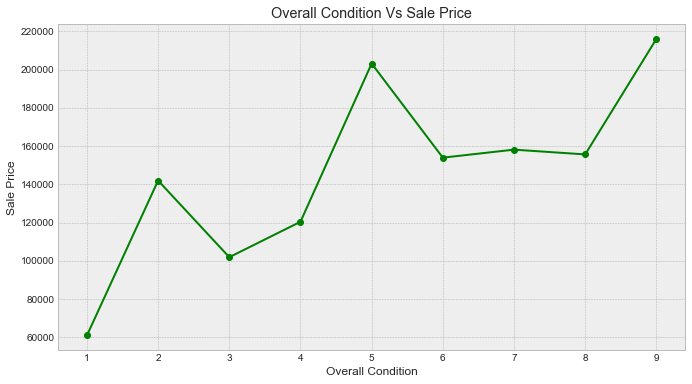

In [118]:
# Plot a line graph
plt.figure(figsize=(10,6))
condition_vs_price.plot(color='green', marker='o')
plt.xlabel('Overall Condition')
plt.ylabel('Sale Price')
plt.title('Overall Condition Vs Sale Price');

In [119]:
"""
It is evident that houses with an overall condition rating of 9(excellent) have the highest seling prices in the market while
houses with an overall condition rating of 1(very poor) fetch the lowest selling price in the market.
"""

'\nIt is evident that houses with an overall condition rating of 9(excellent) have the highest seling prices in the market while\nhouses with an overall condition rating of 1(very poor) fetch the lowest selling price in the market.\n'

### Type of Dwelling

Let's also analyse the relationship between the type of dwelling and the Sale price. This will be used to provide insight into which dwelling have a high sale price.

To begin with, let's view the data in the `BldgType`: plot a bar chart of type of dwelling vs sale price:

In [120]:
# Retrieve the unique values in the column.
df['BldgType'].unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

From this we can conclude that the column has five values. However, the values are not very straightforward and are difficult to understand their meaning. To combat this, let's map the values' definitions into the column. The definitions will be gotten from the `data_description.txt` file.

In [121]:
# Create a dictionary with the column values as the keys and the definitions as the values.
house_type = {
    '1Fam':'Single-Family Detached',
    '2fmCon': 'Two-Family Conversion',
    'Duplex': 'Duplex',
    'TwnhsE': 'Townhouse End Unit',
    'Twnhs': 'Townhouse Inside Unit'
}

Now, we can call the `.map()` method to apply these values into their definitions:

In [122]:
# Map the values to their corresponding definitions from the house_type dictionary.
df['BldgType'] = df['BldgType'].map(house_type)

Let's preview the values:

In [123]:
# Retrieve the unique values in the column to confirm if the mapping worked.
df['BldgType'].unique()

array(['Single-Family Detached', 'Two-Family Conversion', 'Duplex',
       'Townhouse End Unit', 'Townhouse Inside Unit'], dtype=object)

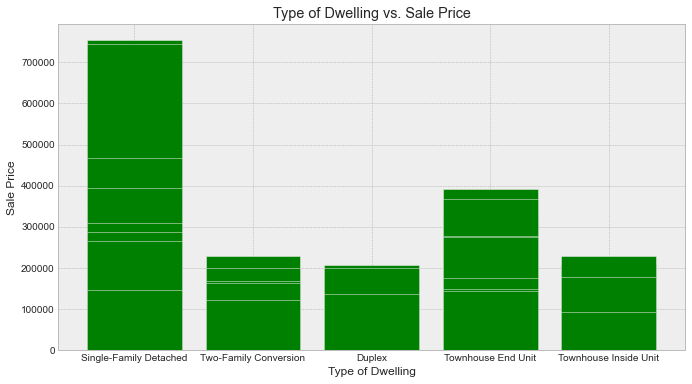

In [153]:
# Plot a bar graph to visualize the relationship between type of dwelling and sale price.
plt.figure(figsize=(10,6))
plt.bar(df['BldgType'], df['SalePrice'], color='green')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Type of Dwelling')
plt.ylabel('Sale Price')
plt.title('Type of Dwelling vs. Sale Price');

In [32]:
"""From this bar chart, it can be interpreted that the Single-Family Detached Dwelling commands the highest sale price while the
Duplex has the lowest price of all the dwellings.
"""

'From this bar chart, it can be interpreted that the Single-Family Detached Dwelling commands the highest sale price while the\nDuplex has the lowest price of all the dwellings.\n'

## Exploring zoning regulations

Zoning is an important aspect in the real estate sector because it deteremines which type of house will be constructed in the area. With so many different zoning classifications, its important to figure out which zoning classification is most profitable.
This can be done by analyzing the different zoning requlations and their impact on the sale price of houses.
To start with, let's create a dictionary with the abbreviations used for the zoning classes together with their definitions:

In [129]:
# Create a dictionary with the column values as the keys and the definitions as the values.
zoning_description = {
    'A' : 'Agriculture', 
    'C (all)' : 'Commercial',
    'FV' : 'Floating Village Residential',
    'I' : 'Industrial',
    'RH' : 'Residential High Density',
    'RL': 'Residential Low Density',
    'RP' : 'Redidential Low Density Park',
    'RM' : 'Residential Medium Density'
    ''
}

In [130]:
# Map the values to their corresponding definitions from the zoning_description dictionary.
df['MSZoning'] = df['MSZoning'].map(zoning_description)

# Group data and reset the index to create a DataFrame
zoning_vs_price = df.groupby('MSZoning')['SalePrice'].mean().reset_index()

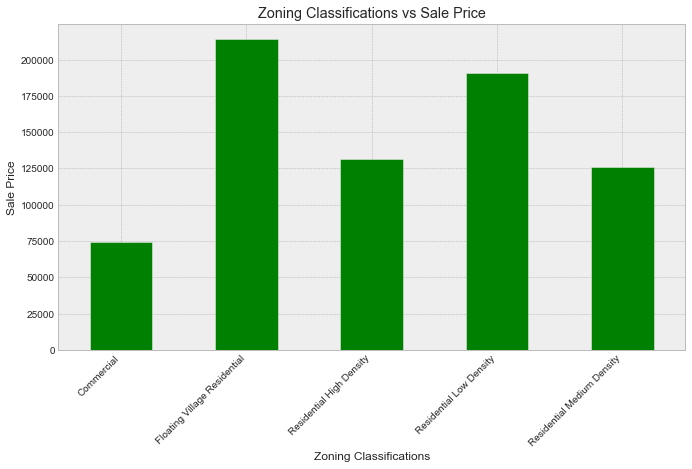

In [131]:
# Plot a bar graph
plt.figure(figsize=(10,6))
zoning_vs_price = df.groupby('MSZoning')['SalePrice'].mean()
zoning_vs_price.plot(kind='bar', color='green')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Zoning Classifications')
plt.title('Zoning Classifications vs Sale Price')
plt.ylabel('Sale Price');

In [132]:
"""
We can derive that the Floating village Residential zoning has a high overall price compared to other zoning classifications.
This is followed closely by Residential Low Density, Residential High Density, Residential Medium Density and then lastly 
Commercial with the lowest sale price.
"""

'\nWe can derive that the Floating village Residential zoning has a high overall price compared to other zoning classifications.\nThis is followed closely by Residential Low Density, Residential High Density, Residential Medium Density and then lastly \nCommercial with the lowest sale price.\n'

## 4. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [133]:
# Replace None with appropriate code
below_average_condition = df.loc[df['OverallCond'] < 5]
average_condition = df.loc[df['OverallCond'] == 5]
above_average_condition = df.loc[df['OverallCond'] > 5]

The following code checks that you created the subsets correctly:

In [134]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

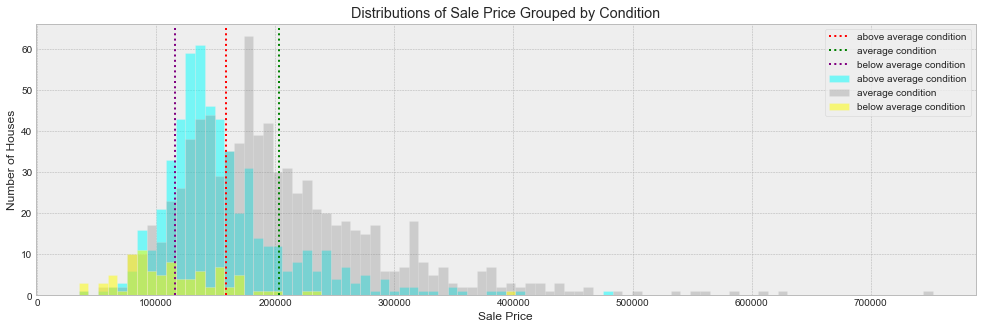

In [135]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
# Plot a line at the mean sale price for above average condition homes
ax.axvline(
    above_average_condition["SalePrice"].mean(), 
    linestyle=":", 
    linewidth=2, 
    color='red', 
    label='above average condition'
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
# Plot a line at the mean sale price for average condition homes
ax.axvline(
    average_condition["SalePrice"].mean(), 
    linestyle=":", 
    linewidth=2,  
    color='green',
    label='average condition'
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)
# Plot a line at the mean sale price for below average condition homes
ax.axvline(below_average_condition["SalePrice"].mean(), 
           linestyle=":", 
           linewidth=2, 
           color='purple',
          label='below average condition',
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [136]:
# Replace None with appropriate text
"""
The distribution of the three conditions is skewed to the right meaning that there are more houses selling for a lower price
The houses in average condition sell for a higher price compared to the houses in above average and below average condition. 
This is evident from the fact that the average condition mean is greater than the above average condition mean.The houses in 
average condition also have a wider range of sale price compared to the houses in above average and below average condition. 
What's surprising about this is that average condition houses are selling ata higher price compared to houses in above 
average condition.
"""

"\nThe distribution of the three conditions is skewed to the right meaning that there are more houses selling for a lower price\nThe houses in average condition sell for a higher price compared to the houses in above average and below average condition. \nThis is evident from the fact that the average condition mean is greater than the above average condition mean.The houses in \naverage condition also have a wider range of sale price compared to the houses in above average and below average condition. \nWhat's surprising about this is that average condition houses are selling ata higher price compared to houses in above \naverage condition.\n"

## 5. The Sale price trend over time

The sale price trend over time will help provide an insight into whether the housing prices are rising or falling. For this analysis we will use `YrSold`. 

Let's plot a bar graph to visualize the trend of sale price:

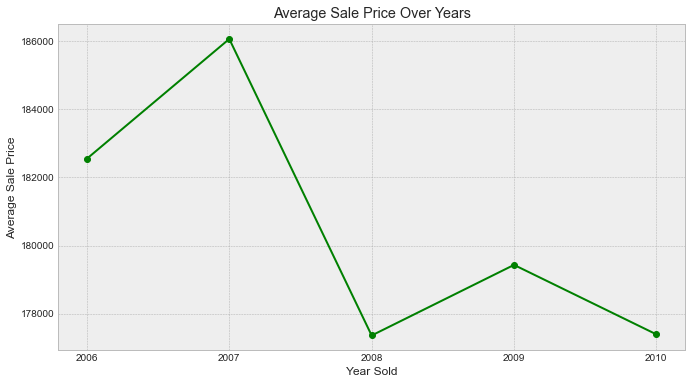

In [137]:
# Group the data by year sold and calculate the mean sale price for each year.
yearly_trend = df.groupby('YrSold')['SalePrice'].mean()

# Import numpy to aid in creating the xticks
import numpy as np
plt.figure(figsize=(10, 6))
yearly_trend.plot(color='green', marker='o')

# Create x-axis ticks to be spaced evenly spaced between 2006 and 2010
xticks=np.linspace(2006,2010, 5)
plt.xticks(xticks)

# Plot labels
plt.xlabel('Year Sold')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price Over Years')
plt.show()

In [138]:
"""
From the graph above, we can derive that the prices went up in 2007 and reached their all-time high. Following this, the 
prices went down in 2008, went slightly high in 2009 then went back to relatively the same value in 2010.
"""

'\nFrom the graph above, we can derive that the prices went up in 2007 and reached their all-time high. Following this, the \nprices went down in 2008, went slightly high in 2009 then went back to relatively the same value in 2010.\n'

## 6. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [139]:
# Your code here
max_corr = df.corr(method='pearson')["SalePrice"].drop("SalePrice").idxmax()
max_corr

'OverallQual'

Now, find the ***most negatively correlated*** column:

In [140]:
# Your code here
min_corr = df.corr(method='pearson')["SalePrice"].drop("SalePrice").idxmin()
min_corr

'KitchenAbvGr'

Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

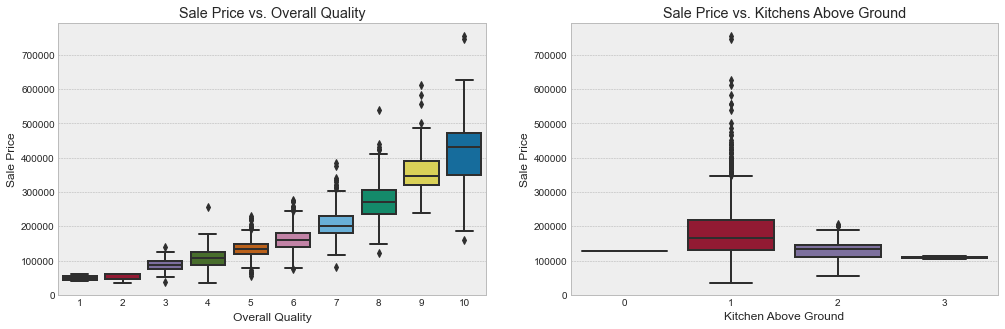

In [141]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df['OverallQual'],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df['KitchenAbvGr'],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title("Sale Price vs. Overall Quality")
ax1.set_xlabel('Overall Quality')
ax1.set_ylabel("Sale Price")
ax2.set_title("Sale Price vs. Kitchens Above Ground")
ax2.set_xlabel('Kitchen Above Ground')
ax2.set_ylabel("Sale Price");

Interpret the results below. Consult `data/data_description.txt` as needed.

In [142]:
# Replace None with appropriate text
"""
First graph.
As the overall quality of the house increaes, the sale price increases as well. Houses in a rating of 10 (very excellent 
condition) are commanding a higher sale price while houses with a rating of 1  (very poor condition)  are being sold at a 
very low price. However, there are outliers at all quality ratings meaning that some houses are being sold at a higher or
price than expected.
The second graph.
This shows that houses with one kitchen above ground are being sold at a higher price compared to houses with 2
and 3 kitchens above ground. To add to this, houses with 3 kitchens above ground are being sold at a very low price.
Moreover, houses with 1 kitchen above ground have the most outliers showing that some sell at significantly higher prices.
"""

'\nFirst graph.\nAs the overall quality of the house increaes, the sale price increases as well. Houses in a rating of 10 (very excellent \ncondition) are commanding a higher sale price while houses with a rating of 1  (very poor condition)  are being sold at a \nvery low price. However, there are outliers at all quality ratings meaning that some houses are being sold at a higher or\nprice than expected.\nThe second graph.\nThis shows that houses with one kitchen above ground are being sold at a higher price compared to houses with 2\nand 3 kitchens above ground. To add to this, houses with 3 kitchens above ground are being sold at a very low price.\nMoreover, houses with 1 kitchen above ground have the most outliers showing that some sell at significantly higher prices.\n'

## 7. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [143]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

2006    314
2007    329
2008    304
2009    338
2010    175
Name: YrSold, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

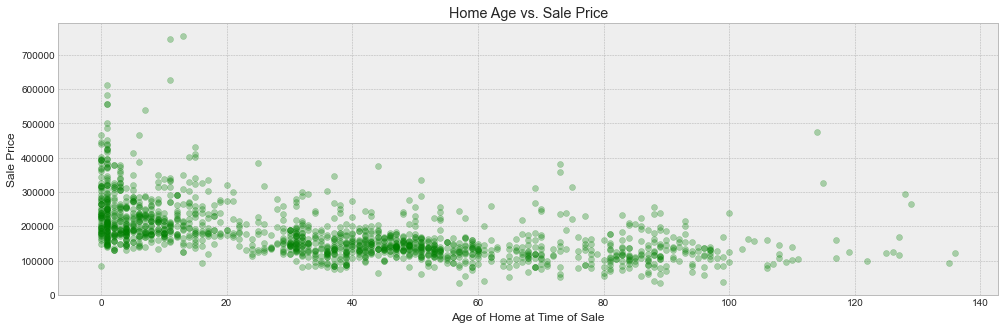

In [144]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [145]:
# Replace None with appropriate text
"""
Houses with a low age go for a higher sale price compared to houses with a high age. As the age of the house increases, the
price decreaces although there are some exceptions. Moreover, there are a lot of houses for sale under the age of 20. This 
is backed up by the dense clusters at ages 0 - 20 which then start scattering past the age 20 showing a decrease in the 
number of houses. From this we can derive that as the age increases the number of houses for sale in the market decreases.
"""

'\nHouses with a low age go for a higher sale price compared to houses with a high age. As the age of the house increases, the\nprice decreaces although there are some exceptions. Moreover, there are a lot of houses for sale under the age of 20. This \nis backed up by the dense clusters at ages 0 - 20 which then start scattering past the age 20 showing a decrease in the \nnumber of houses. From this we can derive that as the age increases the number of houses for sale in the market decreases.\n'

## 8. Evaluation

### a) To analyze the distribution of key housing variables and their impact on sale price.

* Total rooms above grade

Houses with 5 - 9 rooms above grade are very common in the housing market while houses with more than 9 rooms above grade are rare in the market. Moreover, as the number of rooms above grade increase, the sale price of the houses increases. The selling pricereaches its peak at 11 rooms above grade then starts starts falling as the number of rooms increase. It would be best for developers to focus building houses with 5 - 9 rooms above grade since these houses command the highest selling prices in the market.

* Overall Condition

Houses with an overall rating of 5(average) are the most common in the market. The houses in average condition sell for a higher price compared to the houses in above average and below average condition. The houses in average condition also have a wider range of sale price compared to the houses in above average and below average condition. Moreover, houses with an overall condition rating of 9(excellent) have the highest seling prices in the market while houses with an overall condition rating of 1(very poor) fetch the lowest selling price in the market.
What's surprising about this is that average condition houses are selling at a higher price compared to houses in above 
average condition.
I would recommend to the stakeholders to focus on house with above average condition since they fetch a high selling price in  the market compared to houses with a low overall condition rating.
* Type of Dwelling

The Single-Family Detached Dwelling commands the highest sale price while the Duplex has the lowest price of all the dwellings. It would be best for developers to build these dwellings since the have a high selling price potential compared to other types of dwellings.

* Age

Houses with a low age go for a higher sale price compared to houses with a high age. As the age of the house increases, the price decreaces although there are some exceptions. Moreover, there are a lot of houses for sale under the age of 20. The number starts then falling past the age of 20. From this we can derive that as the age increases the number of houses for sale in the market decreases. People looking to flip houses should focus on houses with a low age preferably below 20 years since they have a high seling price potential compared to older houses. 

* Total rooms above grade

Houses with 5 - 9 rooms above grade are very common in the housing market while houses with more than 9 rooms above grade are rare in the market. The number of rooms above grade increase, the sale price of the houses increases. The selling price
reaches its peak at 11 rooms above grade then starts starts falling as the number of rooms increase. 

### b) To analyze which zoning classification of the sale has the highest price.

The Floating village Residential zoning has a high overall price compared to other zoning classifications.
This is followed closely by Residential Low Density, Residential High Density, Residential Medium Density and then lastly 
Commercial with the lowest sale price. developers should focus on building in Floating Village Residential zoning classification since it has a high probability of getting high prices compared to other zoning classifications.

### c) To explore the trends in home sale prices over time.

The prices went up in 2007 and reached their all-time high. Following this, the prices went down in 2008, went slightly high in 2009 then went back to relatively the same value. Investors wanting to invest in real estate should wait a bit until the selling prices increase in order to increase their profit.


### d) To determine which features lead to a higher sale price.

Overall quality of the house has the strongest positive impact on sale price. As the overall quality of the house increases, the sale price increases as well. Houses in a rating of 10 (very excellent condition) are commanding a higher sale price while houses with a rating of 1  (very poor condition)  are being sold at a very low price.

The number of kitchens above ground has the strongest negative impact on sale price. As the number of kitchens increaes, the  sale price of the houses decreases exponentially. Houses with one kitchen above ground are being sold at a higher price compared to houses with 2 and 3 kitchens above ground. To add to this, houses with 3 kitchens above ground are being sold at a very low price.

All real estate stakeholders should strive to deal with houses with above average condition since these houses have a high selling price thus increasing their potential of getting more returns from the sale.